### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt


from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from scipy.stats import zscore


vehicle_data = pd.read_csv("vehicle.csv").dropna()
vehicle_data.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
10,86,36.0,70.0,143.0,61.0,9,133.0,50.0,18.0,130,153.0,266.0,127.0,66.0,2.0,10.0,194.0,202,van
11,90,34.0,66.0,136.0,55.0,6,123.0,54.0,17.0,118,148.0,224.0,118.0,65.0,5.0,26.0,196.0,202,car


In [2]:
vehicle_data.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,93.656827,44.803198,82.04305,169.098401,61.774908,8.599016,168.563346,40.98893,20.558426,147.891759,188.377614,438.382534,174.252153,72.399754,6.351784,12.687577,188.979090,195.729397
std,8.233751,6.146659,15.78307,33.615402,7.973000,4.677174,33.082186,7.80338,2.573184,14.504648,31.165873,175.270368,32.332161,7.475994,4.921476,8.926951,6.153681,7.398781
min,73.000000,33.000000,40.00000,104.000000,47.000000,2.000000,112.000000,26.00000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.00000,141.000000,57.000000,7.000000,146.000000,33.00000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,93.000000,44.000000,79.00000,167.000000,61.000000,8.000000,157.000000,43.00000,20.000000,146.000000,179.000000,364.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,100.000000,49.000000,98.00000,195.000000,65.000000,10.000000,198.000000,46.00000,23.000000,159.000000,217.000000,586.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.00000,333.000000,138.000000,55.000000,265.000000,61.00000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [3]:
vehicle_data['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

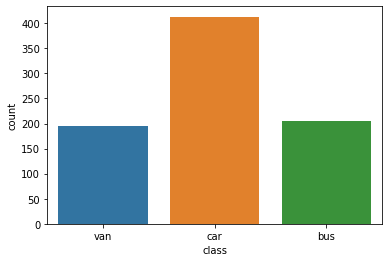

In [4]:
sns.countplot(x='class',data=vehicle_data)

### Check for any missing values in the data 

In [5]:
vehicle_data.isnull()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### 3. Standardize the data 

In [6]:
n_cols=vehicle_data.select_dtypes(include=[np.number]).columns
vehicle_data_std = vehicle_data[n_cols].apply(zscore)
#vehicle_data_std['class'] = vehicle_data['class']
vehicle_data_std.sample(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
520,-0.565926,-0.781913,0.441057,0.145904,-0.473753,-0.128151,0.255178,-0.511494,0.171712,-1.027321,0.437362,0.186213,-0.595816,-0.321192,0.131793,0.595466,0.003400,0.036596
435,-1.052030,-1.270284,-0.890302,-0.717327,-0.222752,-0.556023,-1.166401,1.283704,-0.994877,-1.234278,-1.232157,-1.058346,-1.648047,-0.990411,-0.681472,0.147109,0.979026,0.983281
226,1.621544,1.497149,1.011639,1.217501,0.530251,0.513657,1.495279,-1.280865,1.338300,1.456170,1.047379,1.516406,1.292012,-0.187348,1.555006,-1.422141,-0.159204,0.171837
576,1.864596,1.334359,1.328629,1.217501,0.153750,0.513657,1.525525,-1.409094,1.727163,1.663128,1.304228,1.533533,1.168220,-0.187348,-0.071523,-1.085874,-0.159204,0.442318
639,1.743070,1.659939,1.455425,1.812832,0.781252,0.513657,1.495279,-1.409094,1.338300,1.594142,1.272121,1.544951,1.106324,-0.455036,1.555006,-0.973784,0.166004,0.171837
796,-1.052030,-1.107494,-1.207292,-1.163826,-0.850254,-0.342087,-1.408372,1.796618,-1.383740,-1.234278,-1.649536,-1.252451,-0.936243,-1.124255,2.774903,-0.525427,0.979026,0.712800
621,-0.444400,0.520408,-0.066127,-0.747094,-0.222752,0.085785,-0.561474,0.386105,-0.606014,0.559354,-0.493716,-0.601627,0.796844,0.348027,-0.884788,-1.422141,-0.647017,-0.098644
735,-0.930504,-1.270284,-0.319719,-0.747094,-0.975755,-0.342087,-0.440488,0.257876,-0.606014,-1.441236,-0.301079,-0.493156,-0.905295,-0.187348,1.555006,0.035019,-0.484413,-0.639607
471,1.256966,1.659939,1.709018,1.812832,0.655752,0.727593,1.495279,-1.409094,1.338300,1.801099,1.336334,1.527824,1.601492,-0.722724,0.335109,1.043823,0.328609,0.848040
327,-0.565926,-0.130753,-0.002729,-0.985226,-0.975755,-0.556023,-0.591720,0.514333,-0.606014,-0.268476,-0.590034,-0.607336,-0.193492,-0.588880,0.741741,0.147109,-0.159204,-0.369125


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [7]:
distortion=[]

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [8]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [9]:
clusters=range(1,10)
for k in clusters:
    model=KMeans(n_clusters=k, n_init=5)
    model.fit(vehicle_data_std)
    prediction=model.predict(vehicle_data_std)
    distortion.append(sum(np.min(cdist(vehicle_data_std, model.cluster_centers_, 'euclidean'), axis=1)) / vehicle_data_std.shape[0])


### 6. Plotting Elbow/ Scree Plot

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

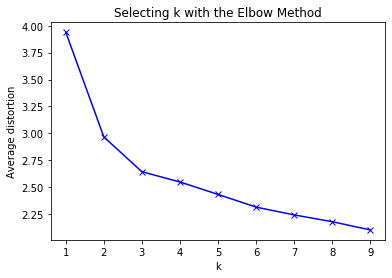

In [10]:
plt.plot(clusters, distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

optimal value of K is 3 as going from 3 to further have very less drop in SSE

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [11]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(vehicle_data_std)
labels = kmeans.predict(vehicle_data_std)
centroids = kmeans.cluster_centers_
centroids

array([[-0.2339617 , -0.57387481, -0.30776905, -0.03041322,  0.2050726 ,
        -0.11653151, -0.45904181,  0.32506329, -0.48798836, -0.53604446,
        -0.41380935, -0.46366305, -0.60155031, -0.61924057, -0.06177969,
         0.01066762,  0.81278556,  0.69897299],
       [ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067],
       [-0.91987072, -0.52009251, -0.89320752, -1.06435572, -0.50042171,
        -0.2190738 , -0.7791213 ,  0.86589322, -0.74535635, -0.484632  ,
        -0.78240328, -0.78341064, -0.38498232,  0.83878747, -0.09524349,
        -0.30171562, -1.05420601, -1.11069466]])

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [12]:
cdf = pd.DataFrame(centroids,columns=vehicle_data.select_dtypes(include=[np.number]).columns)
cdf


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.233962,-0.573875,-0.307769,-0.030413,0.205073,-0.116532,-0.459042,0.325063,-0.487988,-0.536044,-0.413809,-0.463663,-0.601550,-0.619241,-0.061780,0.010668,0.812786,0.698973
1,1.130765,1.170942,1.195006,1.019095,0.215052,0.342508,1.271805,-1.190612,1.275484,1.092668,1.220381,1.281327,1.079542,-0.028795,0.162290,0.265665,-0.005356,0.183801
2,-0.919871,-0.520093,-0.893208,-1.064356,-0.500422,-0.219074,-0.779121,0.865893,-0.745356,-0.484632,-0.782403,-0.783411,-0.384982,0.838787,-0.095243,-0.301716,-1.054206,-1.110695


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [13]:
kmeans.labels_

array([0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 1,
       0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2,
       0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2,
       0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1,
       1, 2, 0, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [23]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])

In [24]:
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])

In [25]:
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [28]:
a.shape

(100, 2)

### 9. Combine all three arrays a,b,c into a dataframe

In [46]:
df = pd.DataFrame(a)
df = df.append(pd.DataFrame(b))
df = df.append(pd.DataFrame(c))

(250, 2)

In [47]:
df.shape

(250, 2)

### 10. Use scatter matrix to print all the 3 distributions

In [53]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1eef8ba8>,
      dtype=object)

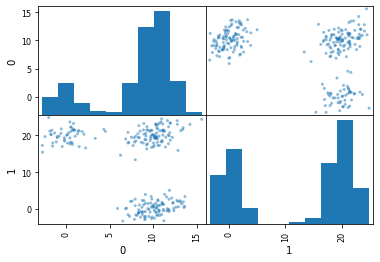

In [54]:
scatter_matrix(df)

### 11. Find out the linkage matrix

In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage

Use ward as linkage metric and distance as Eucledian

In [56]:
Z = linkage(df, 'ward')

In [57]:
Z

array([[4.00000000e+01, 7.20000000e+01, 2.12741415e-02, 2.00000000e+00],
       [5.00000000e+00, 5.60000000e+01, 3.03933890e-02, 2.00000000e+00],
       [3.50000000e+01, 4.90000000e+01, 4.69593137e-02, 2.00000000e+00],
       [1.80000000e+02, 2.15000000e+02, 5.00314023e-02, 2.00000000e+00],
       [1.13000000e+02, 1.34000000e+02, 5.92635411e-02, 2.00000000e+00],
       [1.53000000e+02, 2.48000000e+02, 6.55772235e-02, 2.00000000e+00],
       [2.11000000e+02, 2.40000000e+02, 7.50848601e-02, 2.00000000e+00],
       [1.74000000e+02, 2.14000000e+02, 7.83664884e-02, 2.00000000e+00],
       [1.99000000e+02, 2.39000000e+02, 8.08287034e-02, 2.00000000e+00],
       [2.16000000e+02, 2.32000000e+02, 8.84056342e-02, 2.00000000e+00],
       [4.80000000e+01, 6.40000000e+01, 9.56561822e-02, 2.00000000e+00],
       [1.37000000e+02, 1.40000000e+02, 9.60753952e-02, 2.00000000e+00],
       [1.60000000e+01, 6.30000000e+01, 1.01332409e-01, 2.00000000e+00],
       [1.59000000e+02, 2.41000000e+02, 1.02936663e

### 12. Plot the dendrogram for the consolidated dataframe

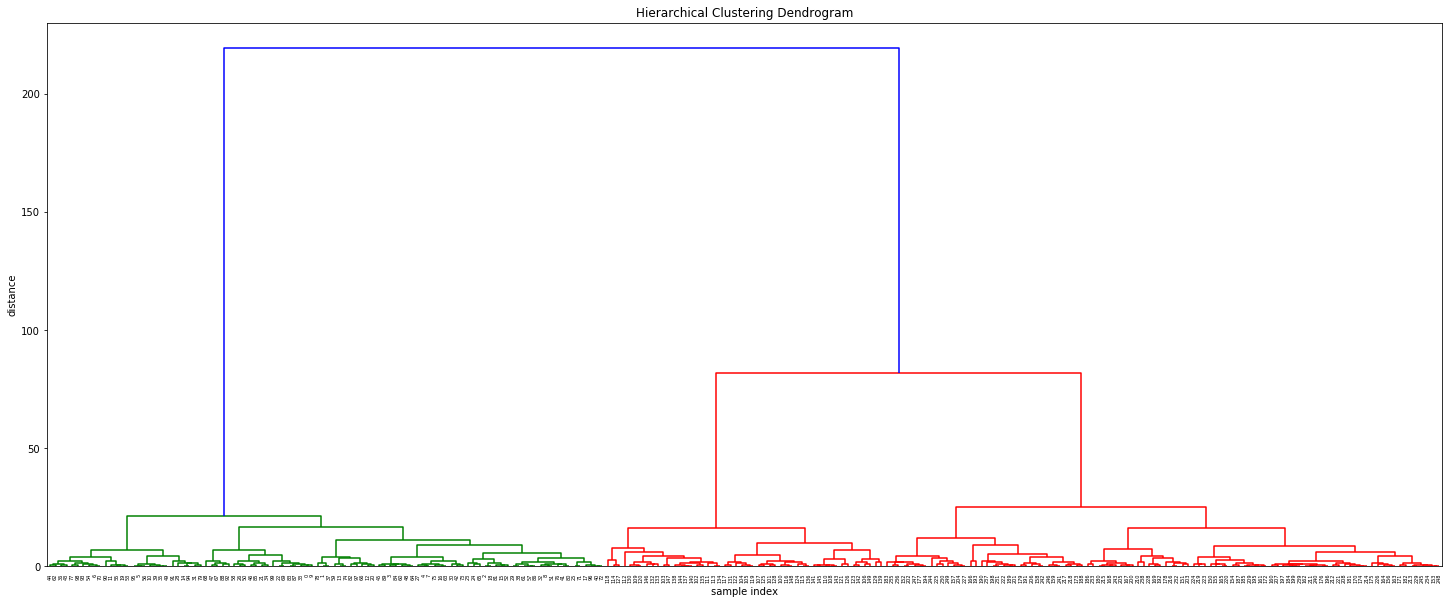

In [69]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z)
plt.show()

### 13. Recreate the dendrogram for last 12 merged clusters 

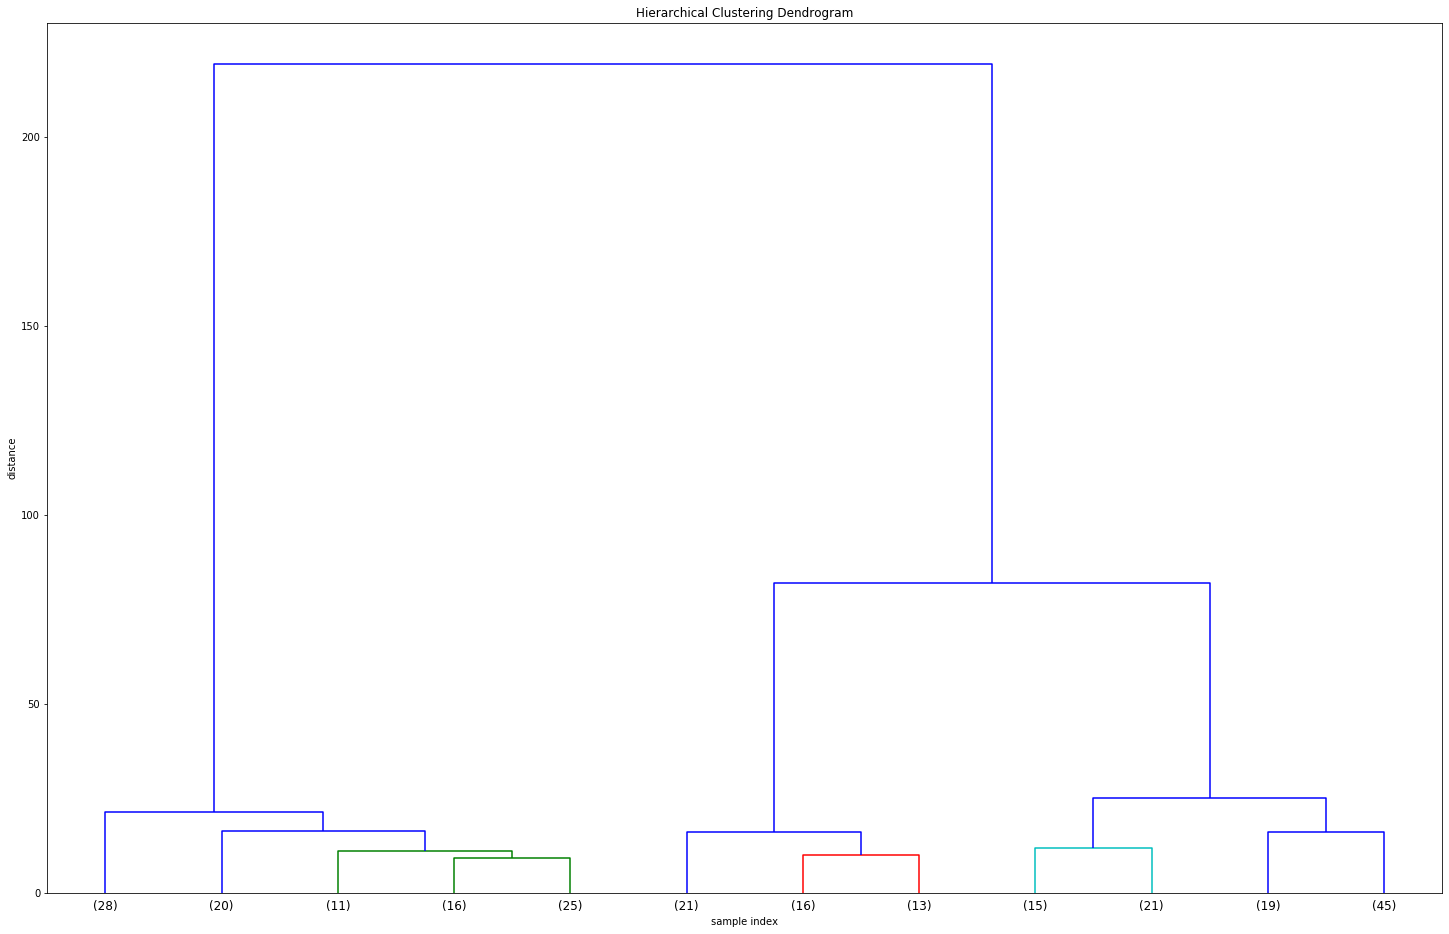

In [81]:
plt.figure(figsize=(25, 16))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z,truncate_mode='lastp',p=12,color_threshold=15)
plt.show()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

### Use matplotlib to visually observe the clusters in 2D space 